In [4]:
import pandas as pd


In [5]:
data = pd.read_csv('data.csv')

In [6]:
data.shape

(171, 1204)

In [7]:
missing_values=data.isnull().sum()
print('Number of missing values grouped by attributes:')
print(missing_values)
missing_values.sum()

Number of missing values grouped by attributes:
MATS3v             0
nHBint10           0
MATS3s             0
MATS3p             0
nHBDon_Lipinski    0
                  ..
nT5Ring            0
SHdNH              0
ETA_dEpsilon_C     0
MDEO-22            0
Class              0
Length: 1204, dtype: int64


0

In [8]:
duplicates=data.duplicated()
print('Number of duplicates',duplicates.sum())

Number of duplicates 0


In [9]:
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
166    False
167    False
168    False
169    False
170    False
Length: 171, dtype: bool

In [10]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split

# X su ulazi (atributi), y su ciljne vrednosti (etikete)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [12]:
X_train.shape

(136, 1203)

In [13]:
X_test.shape

(35, 1203)

In [14]:
sum(y_train.iloc[:]=='Toxic')

45

In [15]:
sum(y_train.iloc[:]=='NonToxic')

91

In [16]:
y_train

11     NonToxic
148    NonToxic
84     NonToxic
167    NonToxic
152    NonToxic
         ...   
39     NonToxic
115       Toxic
107       Toxic
22     NonToxic
108       Toxic
Name: Class, Length: 136, dtype: object

In [17]:
sum(y_test.iloc[:]=='Toxic')

11

In [18]:
sum(y_test.iloc[:]=='NonToxic')

24

In [19]:
sum(y.iloc[:]=='Toxic')

56

In [20]:
sum(y.iloc[:]=='NonToxic')

115

In [21]:
import matplotlib.pyplot as plt

In [22]:
categories = ['Toxic','NonToxic']
values_train = [45,91]
values_test = [11,24]


Text(0, 0.5, 'Vrednosti')

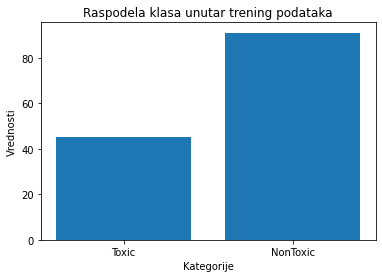

In [23]:
plt.bar(categories, values_train)
plt.title('Raspodela klasa unutar trening podataka')
plt.xlabel('Kategorije')
plt.ylabel('Vrednosti')

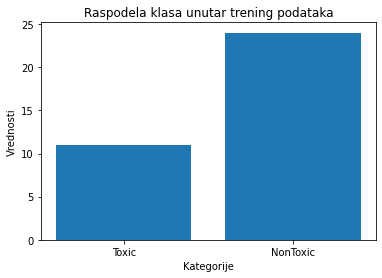

In [24]:
plt.bar(categories, values_test)
plt.title('Raspodela klasa unutar trening podataka')
plt.xlabel('Kategorije')
plt.ylabel('Vrednosti')
plt.show()

In [25]:
import seaborn as sns

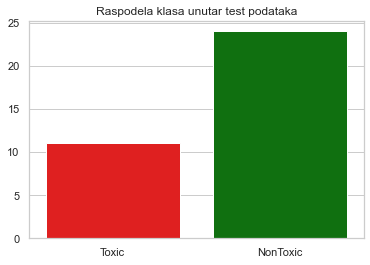

In [72]:
sns.set(style="whitegrid")
sns.barplot(x=categories, y=values_test, palette=['red','green'])
plt.title('Raspodela klasa unutar test podataka')
plt.savefig('test_raspodela_klasa.png')
plt.show()

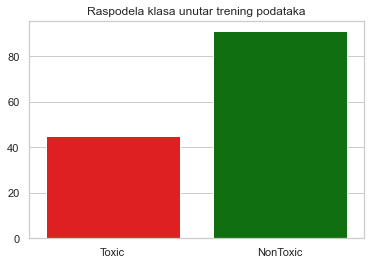

In [73]:
sns.set(style="whitegrid")
sns.barplot(x=categories, y=values_train,palette=['red','green'])
plt.title('Raspodela klasa unutar trening podataka')
plt.savefig('train_raspodela_klasa.png')
plt.show()

In [28]:
35/171

0.2046783625730994

In [29]:
from sklearn.feature_selection import VarianceThreshold

# Kreiranje instance VarianceThreshold sa određenim pragom
threshold = 0.2  # Postavite prag prema vašim potrebama
variance_selector = VarianceThreshold(threshold=threshold)

# Fitovanje selektora na vaše podatke
X_train_selected = variance_selector.fit_transform(X_train)
X_test_selected = variance_selector.transform(X_test)
variance_selected_feature_names = [attribute_name for attribute_name, selected in zip(X_train.columns, variance_selector.get_support()) if selected]
X_train_selected=pd.DataFrame(X_train_selected,columns=variance_selected_feature_names)
X_test_selected=pd.DataFrame(X_test_selected,columns=variance_selected_feature_names)

In [30]:
X_train_selected.shape

(136, 624)

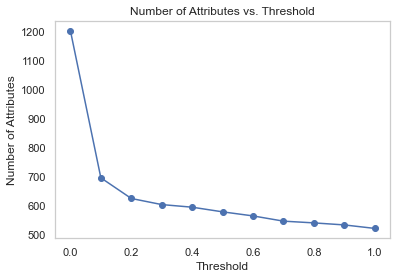

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

# Pretpostavimo da je "X" vaš skup podataka sa atributima
# X je matrica gde su redovi uzorci, a kolone atributi

# Kreiranje niza različitih pragova (0.0 do 1.0)
thresholds = np.arange(0.0, 1.1, 0.1)

# Inicijalizacija praznog niza za čuvanje broja atributa po pragu
num_attributes = []

# Iteracija kroz različite pragove
for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    X_new = selector.fit_transform(x)
    num_attributes.append(X_new.shape[1])

# Kreiranje grafika
plt.plot(thresholds, num_attributes, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Number of Attributes')
plt.title('Number of Attributes vs. Threshold')
plt.grid()
plt.savefig('variance_pragovi.png')
plt.show()


SelectKBest k=300, RFE Accuracy: 0.657,RFE F1-score: (0.25000000000000006, 0.7777777777777777), Time:52.60658049583435


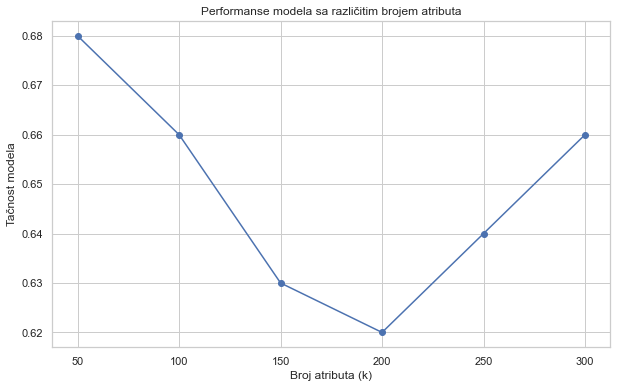

In [32]:
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import time

# Različite vrednosti za k
k_values = [300]

# Inicijalizacija praznih listi za skladištenje rezultata
results = []
start_time = time.time()
# Iteracija kroz različite vrednosti za k
for k in k_values:
    # Primena SelectKBest
    selector = SelectKBest(k=k)
    X_train_kbest = selector.fit_transform(X_train_selected, y_train)
    
    # Primena RFE na manjem skupu atributa
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=15)
    X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
    
    # Treniranje modela
    model = RandomForestClassifier()
    model.fit(X_train_rfe, y_train)
    
    # Predviđanja i evaluacija na test skupu
    X_test_kbest = selector.transform(X_test_selected)
    X_test_rfe = rfe.transform(X_test_kbest)
    y_pred = model.predict(X_test_rfe)
    accuracy = accuracy_score(y_test, y_pred)
    f1_tox=f1_score(y_test,y_pred,pos_label='Toxic')
    f1_notox=f1_score(y_test,y_pred,pos_label='NonToxic')
    
    # Skladištenje rezultata
    results.append((k, accuracy,f1_tox,f1_notox))
end_time = time.time()
# Ispis rezultata
for k, accuracy,f1_tox,f1_notox in results:
    print(f"SelectKBest k={k}, RFE Accuracy: {accuracy:.3f},RFE F1-score: {f1_tox,f1_notox}, Time:{end_time-start_time}")

import matplotlib.pyplot as plt

# Prikupljanje podataka za grafik
k_values = [300,250,200,150,100,50]
accuracies = [0.66,0.64,0.62,0.63,0.66,0.68]

# Kreiranje grafika
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Performanse modela sa različitim brojem atributa")
plt.xlabel("Broj atributa (k)")
plt.ylabel("Tačnost modela")
plt.grid(True)
plt.savefig("izbor_k.png")
plt.show()



In [33]:
(0.69+0.66+0.69+0.69+0.66+0.69)/6

0.68

In [34]:
selector = SelectKBest(k=300)
X_train_kbest = selector.fit_transform(X_train_selected, y_train)
k_selected_feature_names = [attribute_name for attribute_name, selected in zip(X_train_selected.columns, selector.get_support()) if selected]
X_train_kbest=pd.DataFrame(X_train_kbest,columns=k_selected_feature_names)
X_test_kbest = selector.transform(X_test_selected)
X_test_kbest=pd.DataFrame(X_test_kbest,columns=k_selected_feature_names)

In [35]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=15)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
rfe_selected_feature_names = [attribute_name for attribute_name, selected in zip(X_train_kbest.columns, rfe.get_support()) if selected]
X_train_rfe=pd.DataFrame(X_train_rfe,columns=rfe_selected_feature_names)
X_test_rfe = rfe.transform(X_test_kbest)
X_test_rfe=pd.DataFrame(X_test_rfe,columns=rfe_selected_feature_names)

In [36]:
model = RandomForestClassifier()
model.fit(X_train_rfe, y_train)
y_pred_train = model.predict(X_train_rfe)
accuracy_train = accuracy_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test_rfe)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Trening:{accuracy_train}, Test: {accuracy_test}")

Trening:1.0, Test: 0.6


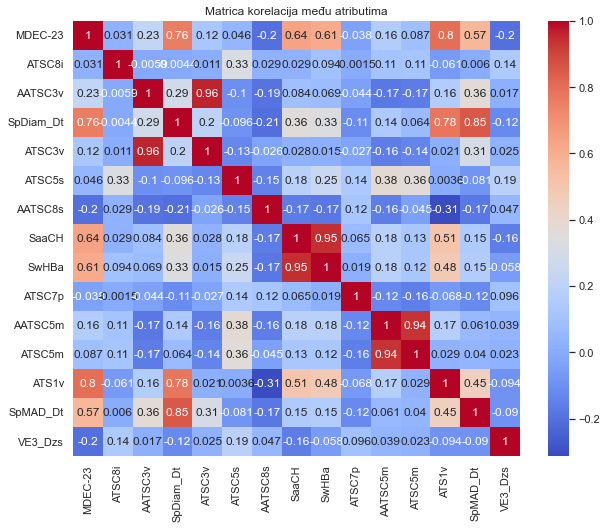

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pretpostavka da je df vaš Pandas data frame sa preostalim atributima
correlation_matrix = X_train_rfe.corr()

# Kreiranje heatmap-e za prikaz korelacija
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrica korelacija među atributima")
#plt.savefig("korelacije.png")
plt.show()

In [38]:
correlation_matrix

,MDEC-23,ATSC8i,AATSC3v,SpDiam_Dt,ATSC3v,ATSC5s,AATSC8s,SaaCH,SwHBa,ATSC7p,AATSC5m,ATSC5m,ATS1v,SpMAD_Dt,VE3_Dzs
MDEC-23,1.000000,0.031492,0.226017,0.758128,0.122384,0.046358,-0.200057,0.640234,0.612314,-0.038015,0.157346,0.086650,0.797800,0.566980,-0.203814
ATSC8i,0.031492,1.000000,-0.005875,-0.004437,0.011049,0.325354,0.029456,0.028737,0.093790,-0.001493,0.105561,0.112698,-0.060814,0.005954,0.141754
AATSC3v,0.226017,-0.005875,1.000000,0.287543,0.961616,-0.103536,-0.189135,0.083634,0.068952,-0.044184,-0.173952,-0.168047,0.156004,0.364764,0.017012
SpDiam_Dt,0.758128,-0.004437,0.287543,1.000000,0.204497,-0.096377,-0.208098,0.356602,0.330425,-0.113881,0.137893,0.063631,0.775138,0.853514,-0.120765
ATSC3v,0.122384,0.011049,0.961616,0.204497,1.000000,-0.128786,-0.026088,0.028207,0.014966,-0.027078,-0.158538,-0.138583,0.020691,0.305336,0.025375
ATSC5s,0.046358,0.325354,-0.103536,-0.096377,-0.128786,1.000000,-0.145476,0.184467,0.247869,0.138516,0.376979,0.361066,0.003607,-0.081407,0.185940
AATSC8s,-0.200057,0.029456,-0.189135,-0.208098,-0.026088,-0.145476,1.000000,-0.166242,-0.173514,0.117493,-0.159347,-0.045089,-0.311596,-0.174918,0.047065
SaaCH,0.640234,0.028737,0.083634,0.356602,0.028207,0.184467,-0.166242,1.000000,0.945995,0.064595,0.184338,0.127351,0.510843,0.146835,-0.162500
SwHBa,0.612314,0.093790,0.068952,0.330425,0.014966,0.247869,-0.173514,0.945995,1.000000,0.018578,0.180887,0.123858,0.484379,0.154656,-0.058200
ATSC7p,-0.038015,-0.001493,-0.044184,-0.113881,-0.027078,0.138516,0.117493,0.064595,0.018578,1.000000,-0.122242,-0.155623,-0.068139,-0.119270,0.096414


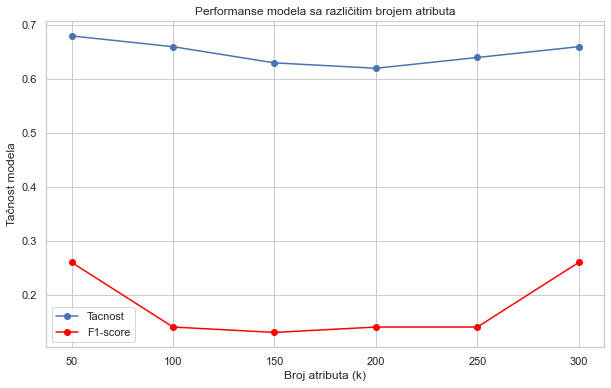

In [39]:
k_values = [300,250,200,150,100,50]
accuracies = [0.66,0.64,0.62,0.63,0.66,0.68]
f1_scores=[0.26,0.14,0.14,0.13,0.14,0.26]
# Kreiranje grafika
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o',label='Tacnost')
plt.plot(k_values, f1_scores, marker='o',color='red',label='F1-score')
plt.title("Performanse modela sa različitim brojem atributa")
plt.xlabel("Broj atributa (k)")
plt.ylabel("Tačnost modela")
plt.grid(True)
plt.legend()
plt.savefig("izbor_k.png")
plt.show()

In [40]:
X_train_rfe.columns

Index(['MDEC-23', 'ATSC8i', 'AATSC3v', 'SpDiam_Dt', 'ATSC3v', 'ATSC5s',
       'AATSC8s', 'SaaCH', 'SwHBa', 'ATSC7p', 'AATSC5m', 'ATSC5m', 'ATS1v',
       'SpMAD_Dt', 'VE3_Dzs'],
      dtype='object')

In [41]:
feature_importances = model.feature_importances_
serija_znacajnosti=pd.Series(data=feature_importances*100,index=X_train_rfe.columns)

In [42]:
X_train_rfe=X_train_kbest[['MDEC-23', 'ATSC8i', 'AATSC3v', 'SpDiam_Dt', 'ATS1m', 'ATSC3v',
       'ATSC5s', 'SHaaCH', 'SaaCH', 'SwHBa', 'ATSC5v', 'SpMax_Dt', 'ATSC5m',
       'SpMAD_Dt', 'LipoaffinityIndex']]
X_test_rfe=X_test_kbest[['MDEC-23', 'ATSC8i', 'AATSC3v', 'SpDiam_Dt', 'ATS1m', 'ATSC3v',
       'ATSC5s', 'SHaaCH', 'SaaCH', 'SwHBa', 'ATSC5v', 'SpMax_Dt', 'ATSC5m',
       'SpMAD_Dt', 'LipoaffinityIndex']]

<AxesSubplot:>

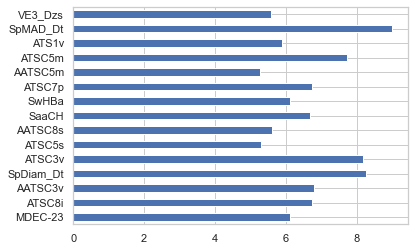

In [43]:
fig, ax = plt.subplots()
serija_znacajnosti.plot(kind='barh', ax=ax)
#plt.savefig('znacajnosti.png')

In [44]:
X_train_rfe_1=X_train_rfe.drop('SpMax_Dt',axis=1)
X_test_rfe_1=X_test_rfe.drop('SpMax_Dt',axis=1)


In [45]:
model = RandomForestClassifier()
model.fit(X_train_rfe_1, y_train)
y_pred_train = model.predict(X_train_rfe_1)
accuracy_train = accuracy_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test_rfe_1)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_tox=f1_score(y_test,y_pred,pos_label='Toxic')
f1_notox=f1_score(y_test,y_pred,pos_label='NonToxic')
print(f"Trening:{accuracy_train}, Test: {accuracy_test}, F1-tox:{f1_tox}, F1-noTox:{f1_notox}")

Trening:1.0, Test: 0.6285714285714286, F1-tox:0.25000000000000006, F1-noTox:0.7777777777777777


In [46]:
X_train_rfe=X_train_rfe_1
X_test_rfe=X_test_rfe_1

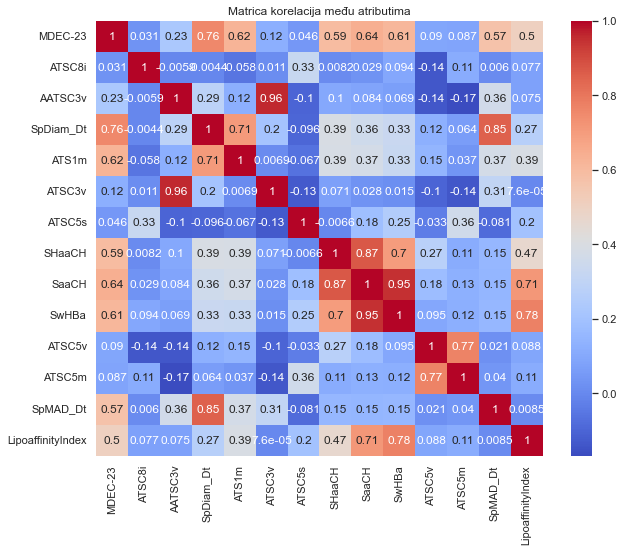

In [47]:
correlation_matrix = X_train_rfe.corr()

# Kreiranje heatmap-e za prikaz korelacija
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrica korelacija među atributima")
#plt.savefig("korelacije.png")
plt.show()

In [48]:
X_train_rfe_1=X_train_rfe.drop('ATSC3v',axis=1)
X_test_rfe_1=X_test_rfe.drop('ATSC3v',axis=1)

In [49]:
model = RandomForestClassifier()
model.fit(X_train_rfe_1, y_train)
y_pred_train = model.predict(X_train_rfe_1)
accuracy_train = accuracy_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test_rfe_1)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_tox=f1_score(y_test,y_pred,pos_label='Toxic')
f1_notox=f1_score(y_test,y_pred,pos_label='NonToxic')
print(f"Trening:{accuracy_train}, Test: {accuracy_test}, F1-tox:{f1_tox}, F1-noTox:{f1_notox}")

Trening:1.0, Test: 0.6285714285714286, F1-tox:0.25000000000000006, F1-noTox:0.7777777777777777


In [50]:
X_train_rfe=X_train_rfe_1
X_test_rfe=X_test_rfe_1

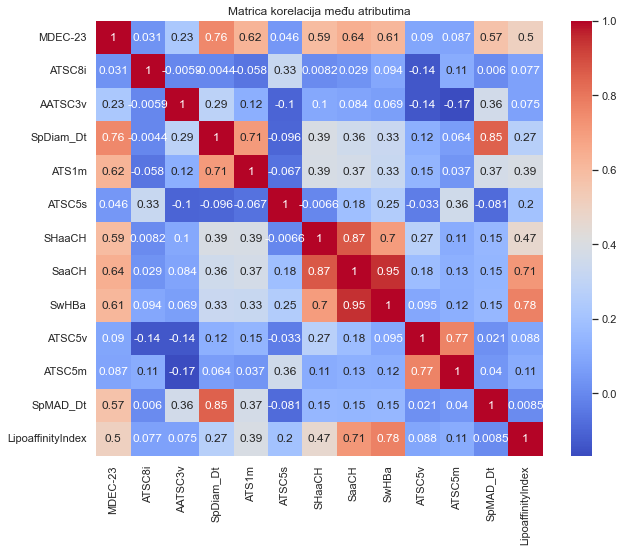

In [51]:
correlation_matrix = X_train_rfe.corr()

# Kreiranje heatmap-e za prikaz korelacija
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrica korelacija među atributima")
#plt.savefig("korelacije.png")
plt.show()

In [52]:
X_train_rfe_1=X_train_rfe.drop('SaaCH',axis=1)
X_test_rfe_1=X_test_rfe.drop('SaaCH',axis=1)

In [53]:
model = RandomForestClassifier()
model.fit(X_train_rfe_1, y_train)
y_pred_train = model.predict(X_train_rfe_1)
accuracy_train = accuracy_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test_rfe_1)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_tox=f1_score(y_test,y_pred,pos_label='Toxic')
f1_notox=f1_score(y_test,y_pred,pos_label='NonToxic')
print(f"Trening:{accuracy_train}, Test: {accuracy_test}, F1-tox:{f1_tox}, F1-noTox:{f1_notox}")

Trening:1.0, Test: 0.6571428571428571, F1-tox:0.25000000000000006, F1-noTox:0.7777777777777777


In [54]:
X_train_rfe=X_train_rfe_1
X_test_rfe=X_test_rfe_1

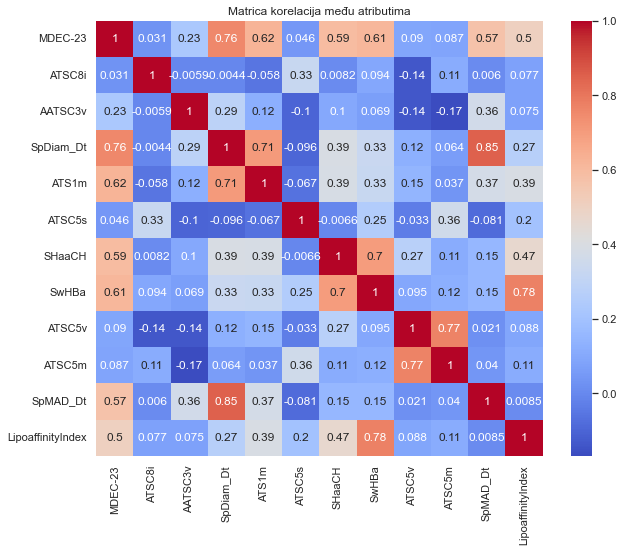

In [69]:
correlation_matrix = X_train_rfe.corr()

# Kreiranje heatmap-e za prikaz korelacija
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrica korelacija među atributima")
plt.savefig("korelacije_krajnje.png")
plt.show()

In [58]:
X_train_rfe.to_csv("X_train_rfe.csv",index=False)

In [59]:
X_test_rfe.to_csv("X_test_rfe.csv",index=False)

In [60]:
y_train.to_csv("y_train.csv",index=False)

In [61]:
y_test.to_csv("y_test.csv",index=False)

C:\Users\KORISNIK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\KORISNIK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


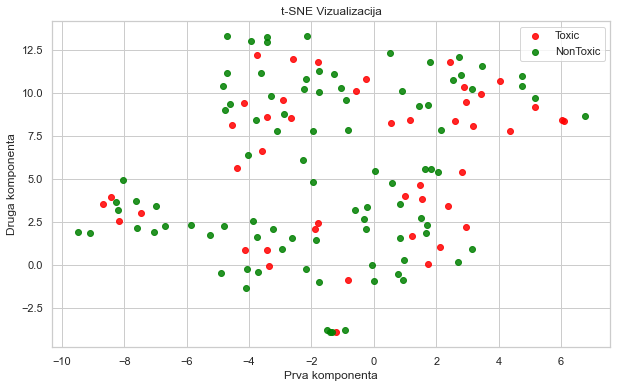

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Pretpostavimo da je X_train_rfe vaša matrica sa smanjenim atributima nakon primene SMOTE

# Kreiranje instance t-SNE modela sa 2 komponente (2D grafikon)
tsne = TSNE(n_components=2, random_state=42)

# Transformacija podataka
X_tsne = tsne.fit_transform(X_train_rfe)

# Pretpostavimo da je y_train oznaka klasa za X_train_rfe

# Kreiranje t-SNE grafikona
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[y_train=='Toxic', 0], X_tsne[y_train=='Toxic', 1], label='Toxic', alpha=0.85,color='red')
plt.scatter(X_tsne[y_train=='NonToxic', 0], X_tsne[y_train=='NonToxic', 1], label='NonToxic', alpha=0.85,color='green')
plt.legend()
plt.title('t-SNE Vizualizacija')
plt.xlabel('Prva komponenta')
plt.ylabel('Druga komponenta')
plt.savefig('Vizualizacija_pre_SMOTE.png')
plt.show()
